# Multiple linear regression

Created on JupyterLite

*See also the R file about this subject*

*Please, refer to the PowerPoint slide dedicated to it for a visual explanation (TheoreticalExplanations.pdf).*

Import packages

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

Read the data

In [2]:
df = pd.read_csv("FuelConsumptionCo2.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


Select the features needed for the regression

In [3]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
5,3.5,6,11.9,7.7,10.0,230
6,3.5,6,11.8,8.1,10.1,232
7,3.7,6,12.8,9.0,11.1,255
8,3.7,6,13.4,9.5,11.6,267


In [4]:
cdf.describe()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
count,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,3.346298,5.794752,13.296532,9.474602,11.580881,256.228679
std,1.415895,1.797447,4.101253,2.794510,3.485595,63.372304
min,1.000000,3.000000,4.600000,4.900000,4.700000,108.000000
25%,2.000000,4.000000,10.250000,7.500000,9.000000,207.000000
50%,3.400000,6.000000,12.600000,8.800000,10.900000,251.000000
75%,4.300000,8.000000,15.550000,10.850000,13.350000,294.000000
max,8.400000,12.000000,30.200000,20.500000,25.800000,488.000000


Plot the features

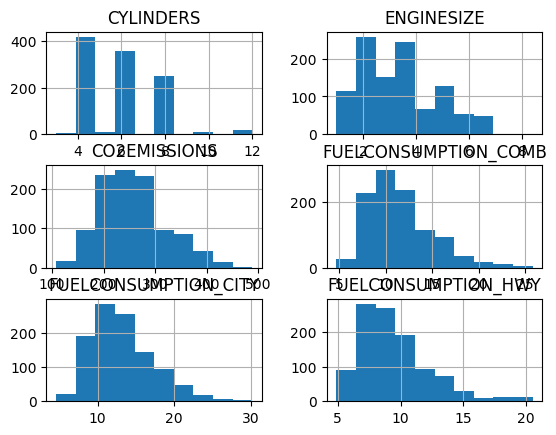

In [5]:
viz = df[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY']]
viz.hist()
plt.show()

Visually inspect the linear relationship between CO2 emissions and the features of interest

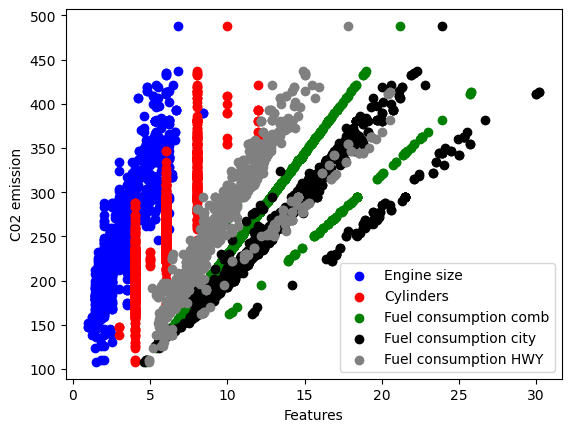

In [6]:
plt.scatter(df.ENGINESIZE, df.CO2EMISSIONS,  color='blue')
plt.scatter(df.CYLINDERS, df.CO2EMISSIONS,  color='red')
plt.scatter(df.FUELCONSUMPTION_COMB, df.CO2EMISSIONS,  color='green')
plt.scatter(df.FUELCONSUMPTION_CITY, df.CO2EMISSIONS,  color='black')
plt.scatter(df.FUELCONSUMPTION_HWY, df.CO2EMISSIONS,  color='gray')
plt.xlabel("Features")
plt.ylabel("C02 emission")
plt.legend(['Engine size', 'Cylinders', 'Fuel consumption comb', 'Fuel consumption city', 'Fuel consumption HWY'])
plt.show()

A multiple regression model is designed to predict CO2 emissions from 'ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB'

Select random rows to set apart 80% of the data for training and 20% for testing

In [7]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [8]:
train.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
5,3.5,6,11.9,7.7,10.0,230
6,3.5,6,11.8,8.1,10.1,232


Regression modelling with sklearn

In [9]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x, train_y)
# Output the coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[11.40881625  6.739683    9.68981483]]
Intercept:  [67.00086941]


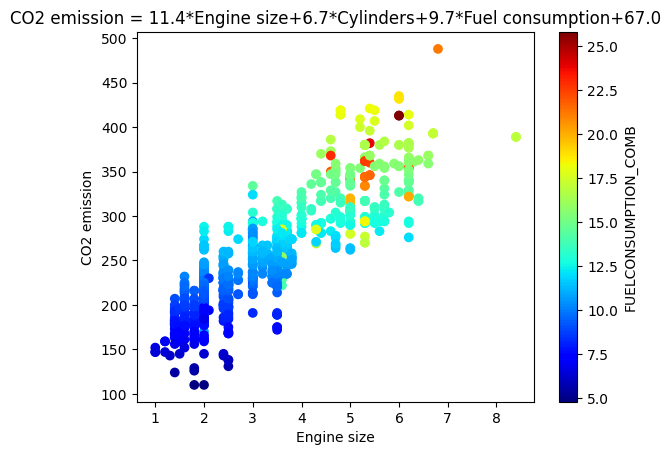

In [10]:
cmap = plt.get_cmap('jet', 250) 
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, c=train.FUELCONSUMPTION_COMB, cmap=cmap) 
plt.colorbar(label="FUELCONSUMPTION_COMB", orientation="vertical") 
plt.xlabel("Engine size")
plt.ylabel("CO2 emission")
plt.title('CO2 emission = {:.1f}*Engine size+{:.1f}*Cylinders+{:.1f}*Fuel consumption+{:.1f}'.format(regr.coef_[0,0],regr.coef_[0,1],regr.coef_[0,2], regr.intercept_[0]))
plt.show() 

Prediction

In [11]:
test_x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

y_hat= regr.predict(test_x)

from sklearn.metrics import r2_score

print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares: %.2f" % np.mean((y_hat - test_y) ** 2))
print("Root Mean Squared Error (RMSE): %.2f" % np.sqrt(np.mean((y_hat - test_y) ** 2)))

# Explained variance score: 1 is perfect prediction
print('Variance score (R2): %.2f' % regr.score(test_x, test_y))
# Check
print("R2-score: %.2f" % r2_score(test_y , y_hat) )

Mean absolute error: 16.95
Residual sum of squares: 557.17
Root Mean Squared Error (RMSE): 23.60
Variance score (R2): 0.87
R2-score: 0.87


**Explained variance regression score:**\
Let $\hat{y}$ be the estimated target output, y the corresponding (correct) target output, and Var be the Variance (the square of the standard deviation). Then the explained variance is estimated as follows:

$\texttt{explainedVariance}(y, \hat{y}) = 1 - \frac{Var{ y - \hat{y}}}{Var{y}}$\
The best possible score is 1.0, the lower values are worse.

# Authors' rights

Machine Learning with Python course by IBM on Coursera: https://www.coursera.org/learn/machine-learning-with-python/

Completed and modified by Mathilde Marie Duville as part of the IBM Artificial Intelligence Engineering Professional Certificate and corresponding IBM badges. Please, follow the subsequent links to confirm the accreditation:

https://www.coursera.org/account/accomplishments/professional-cert/KSLW773DAATP?utm_source=link&utm_medium=certificate&utm_content=cert_image&utm_campaign=sharing_cta&utm_product=prof

https://www.credly.com/users/mathilde-marie-duville/badges

------------------------------------------------------------------------------------------------------------------------------------------------------

Author: Saeed Aghabozorgi

Other Contributors: Joseph Santarcangelo

Change Log

Date (YYYY-MM-DD)	Version	Changed By	Change Description

2020-11-03	2.1	Lakshmi	Made changes in URL

2020-08-27	2.0	Lavanya	Moved lab to course repo in GitLab

© IBM Corporation 2020. All rights reserved. 